# Выпускной проект

**Банки — Сегментация пользователей по потреблению**

## Сбор первичной информации о проекте

### Описание проекта

Банк в срочном порядке ищет аналитиков c уверенным владением Python. Вашей главной задачей станет сегментирование пользователей банка. Сегментация покажет, как клиенты пользуются нашими услугами. **«Метанпромбанк» — деньги не пахнут!**

### Задачи проекта 

Проанализировать клиентов регионального банка и выполнить сегментирование пользователей по количеству потребляемых продуктов. На основе выполненного анализа данных предложить на рассмотрение ответственному менеджеру меры по удержанию клиентов.

1. Проведите исследовательский анализ данных.
2. Сегментируйте пользователей на основе данных о количестве потребляемых продуктов.
3. Сформулируйте и проверьте статистические гипотезы.  
    * Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.   
    * Проверьте гипотезу различия среднего уровня заработной платы клиентов, мужского и женского пола, которые пользуются одним продуктом банка. 
4. Подготовьте презентацию и отправьте ее через облачное хранилище в формате pdf. Приложите ссылку на презентацию в markdown-ячейке.
5. Подготовьте дашборд к проекту в Tableau.

### Описание данных

Таблица **bank_dataset**:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Основной проект

### Предобработка данных:

In [3]:
# Add modules to the project
import math as mth
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt 

# Add additional modules for machine learning
from scipy                   import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.metrics         import accuracy_score, precision_score, recall_score

# Ignore warnings of Jupiter 
import warnings
warnings.filterwarnings("ignore")

# Logical indicator for local and yandex machine
lmachine = 'yandex'
#lmachine = 'local'

In [4]:
# Get common information about datasets
def get_info(df, df_name):
    '''
    Эта функция содержит набор команд для предварительной обработки данных
    df : Dataframe,
        The dataset with data for the project
    df_name : Objects
        The name of the dataset for information
        
    Return:
        There are no return fields
    '''
    print(f'Common information about - {df_name}')
    display(df.head())
    print('')
    df.info()
    print('\n', 'Columns name', '\n')
    print(df.columns, '\n')   
    print(f'Numbers of NaN values in the dataset - {df_name}')
    print(df.isnull().sum())
    print('')
    print(f'Numbers of duplicates (explicit)in the dataset - {df_name}')
    print(df.duplicated().sum())
     

# Get data
if lmachine == 'local':
    print('Using local machine')
    main_path = 'C:/Users/Churiulin/Desktop/Yandex/Projects/DATASETS'
    df_bank   = pd.read_csv(f'{main_path}/bank_dataset.csv')
else:
    print('Using Yandex machine')
    df_bank   = pd.read_csv('/datasets/bank_dataset.csv')

Using Yandex machine


In [5]:
print(get_info(df_bank, 'df_bank')) 

Common information about - df_bank


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

 Columns name 

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
     

**После первичного анализа данных можно заметить следующие проблемы:**

1. Название столбцов записаны с использованием разных регистров. Кроме того, внутри текстовых столбцов также встречаются записи разного регистра. Исправлю эту ситуацию.  

In [6]:
# Change columns register 
df_bank.columns = df_bank.columns.str.lower()

# List of columns with Objects type
column_list = ['city', 'gender']
for col in column_list:
    df_bank[col] = df_bank[col].str.lower()

2. В столбце **estimated_salary** используется тип данных *float64*, что не имеет особого смысла, поскольку количество копеек не оказывает существенного влияния на зарплату, которая составляет тысячи и сотни тысяч рублей.

In [7]:
column_list = ['estimated_salary']
for col in column_list:
    df_bank[col] = df_bank[col].astype('int')

3. В данных есть пропуски, а именно, в столбце **balance** - в принципе заполнить пропуски в данной графе можно медианными значениями, в зависимости от нескольких дополнительных показателей, таких как: **city**, **score**, **estimated_salary**, предварительно создав две дополнительные категориальные переменные. С другой стороны, посмотрев на корреляционную матрицу, можно отметить, что эти столбцы практически никак не связаны со значениями в столбце **Balance**, и эти пропуски следует оставить пустыми, поскольку любое заполнение медианными значениями исказит текущую ситуацию и внесет дополнительные погрешности.

Кроме того, из корреляционной матрицы можно заключить, что наибольшее влияние на отток клиентов оказывают такие факторы, как: **age**, **loylty** и **products**; меньше всего влияние оказывают такие факторы, как: **userid**, **creditcard**. 

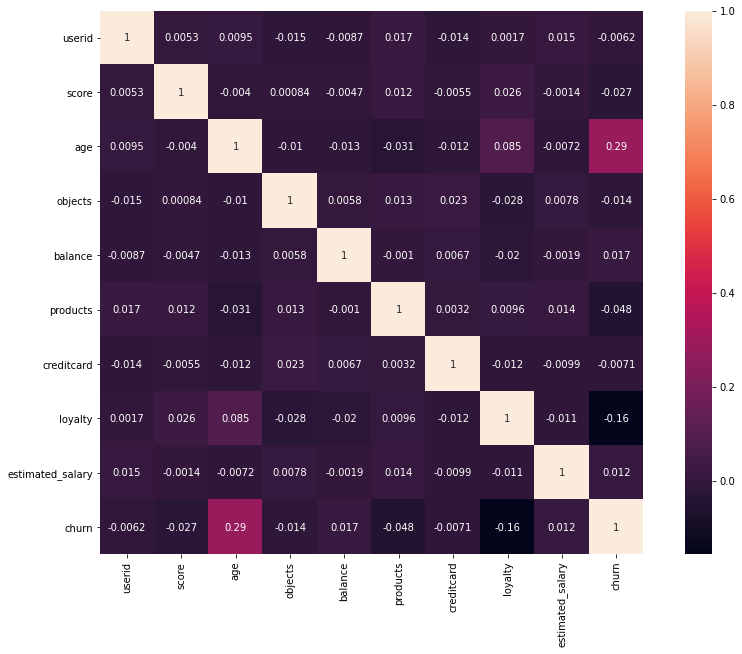

In [6]:
# Create correlation matrix
df_bank_corr = df_bank.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_bank_corr, annot = True, square = True)
#ax.set_ylim(7, 0)
plt.show()

Тем не менее, можно попытаться установить причины, которые повлекли за собой наличие пропусков. Для этого выполню следующие шаги:
* Создам отдельный набор данных, содержащий только строки с пропусками, и сгруппирую данные по колонке **city**;

Кроме того, отмечу, что для дальнейшей работы с машинным обучением и более красивой визуализации сегментов необходимо заменить строковые переменные в столбцах **city** и **gender** на целочисленные значения:

1. столбц **city**:
    * 1 - ярославль;
    * 2 - рыбинск;
    * 3 - ростов великий.
    
    
2. столбц **gender**:
    * ж - 0;
    * м - 1.

In [7]:
# Change values in city column
df_bank['city'] = df_bank['city'].replace('ярославль'     , 1)
df_bank['city'] = df_bank['city'].replace('рыбинск'       , 2)
df_bank['city'] = df_bank['city'].replace('ростов великий', 3)

# Change values in gender column
df_bank['gender'] = df_bank['gender'].replace('ж', 0)
df_bank['gender'] = df_bank['gender'].replace('м', 1)

In [8]:
# The full list of city in the orinal dataframe
print(df_bank['city'].unique())

#report = df_bank.query('balance.isnull()')

# Create report based on city columns
report = (df_bank
            .query('balance.isnull()')
            .groupby(['city','churn'])
            .agg({'userid' : ['count']})
            .reset_index()
         )

# Rename columns
report.columns = ['city','clients_status', 'clients_numbers']

# Change status to people friendly view
report['clients_status']     = report['clients_status'].replace(0,'остался')
report['clients_status']     = report['clients_status'].replace(1,'ушел'   )
# Change city name for report
report['city']     = report['city'].replace(1,'ярославль')
report['city']     = report['city'].replace(2,'рыбинск'  )

# Get numbers
report['clients_numbers'] = (report['clients_numbers'] / sum(report['clients_numbers']))*100

pd.set_option('display.float_format', '{:.2f}%'.format)
                               
report

[1 2 3]


,city,clients_status,clients_numbers
0,ярославль,остался,57.53%
1,ярославль,ушел,9.32%
2,рыбинск,остался,28.64%
3,рыбинск,ушел,4.51%


***Вывод по разделу:*** Все клиенты из Ростова Великого имеют заполненные поля в столбце **Balance**. Наибольшее количество пропусков зафиксировано в Ярославском отделении банка (2417 случаев). Пропуски также есть и Рыбинском отделении (1199 случаев). Отдельно отмечу, что большинство данных из столбца **Balance** отсутствуют у действующих клиентов банка. 

* Сгруппирую данные по колонкам **estimated_salary** и **score**, предварительно категоризировав столбцы.

Новый столбец **cat_salary** с зарплатными категориям: 
* зарплата от 0 до 30 тысяч рублей - ***sg1***;
* зарплата от 30 до 60 тысяч рублей - ***sg2***;
* зарплата от 60 до 90 тысяч рублей - ***sg3***;
* зарплата от 90 до 120 тысяч рублей - ***sg4***;
* зарплата > 120 тысяч рублей - ***sg5***

Новый столбец **cat_score** с рейтингом клиентов: 
* рейтинг от 0 до 200 - ***scr1***;
* рейтинг от 200 до 400 - ***scr2***;
* рейтинг от 400 до 600 - ***scr3***;
* рейтинг от 600 до 800 - ***scr4***;
* рейтинг > 800 - ***scr5***

In [9]:
report = df_bank.query('balance.isnull()')

# Create categories                                     level of salary
report['cat_salary'] = pd.cut(report['estimated_salary'], [0    , 30000 , 60000 ,
                                                           90000, 120000, np.inf], 
                              labels = ['sg1', 'sg2', 'sg3', 'sg4', 'sg5']
                             )

# Create categories                                     level of salary
report['cat_score'] = pd.cut(report['score'], [0  , 200, 400   ,
                                               600, 800, np.inf], 
                             labels = ['scr1', 'scr2', 
                                       'scr3', 'scr4', 'scr5']
                            )

# Create final reports
freport = (report            
            .groupby(['cat_salary','churn'])
            .agg({'userid' : ['count']})
            .reset_index()
          )

# Rename columns
freport.columns = ['salary', 'clients_status', 'clients_numbers']

# Change status to people friendly view
freport['clients_status']  = freport['clients_status'].replace(0,'остался')
freport['clients_status']  = freport['clients_status'].replace(1,'ушел'   )
freport['clients_numbers'] = (freport['clients_numbers'] / sum(freport['clients_numbers'])) * 100

print('Зарплатные группы')
pd.set_option('display.float_format', '{:.2f}%'.format)
freport

Зарплатные группы


,salary,clients_status,clients_numbers
0,sg1,остался,13.55%
1,sg1,ушел,2.02%
2,sg2,остался,12.83%
3,sg2,ушел,1.99%
4,sg3,остался,12.91%
5,sg3,ушел,2.05%
6,sg4,остался,13.35%
7,sg4,ушел,2.13%
8,sg5,остался,33.54%
9,sg5,ушел,5.64%


In [10]:
# Create final reports
freport = (report            
            .groupby(['cat_score','churn'])
            .agg({'userid' : ['count']})
            .reset_index()
          )

# Rename columns
freport.columns = ['score',  'clients_status', 'clients_numbers']

# Change status to people friendly view
freport['clients_status']  = freport['clients_status'].replace(0,'остался')
freport['clients_status']  = freport['clients_status'].replace(1,'ушел'   )
freport['clients_numbers'] = (freport['clients_numbers'] / sum(freport['clients_numbers'])) * 100

print('Рейтинговые группы')
pd.set_option('display.float_format', '{:.2f}%'.format)
freport

Рейтинговые группы


,score,clients_status,clients_numbers
0,scr1,остался,0.00%
1,scr1,ушел,0.00%
2,scr2,остался,0.00%
3,scr2,ушел,0.14%
4,scr3,остался,26.87%
5,scr3,ушел,4.42%
6,scr4,остался,53.80%
7,scr4,ушел,8.46%
8,scr5,остался,5.50%
9,scr5,ушел,0.80%


***Вывод по разделу:*** У группы клиентов с высокой заработной платой чаще других присутствует пропуск в графе баланса, что подтверждается двумя сводными таблицами (*Зарплатные группы* и *Рейтинговые группы*).

**Общий вывод:** В связи с зафиксированными фактами предположу, что причинами могут являться:
1. Клиенты выполнили какую-то банковскую операцию (перевод средств другому клиенту, покупка, пополнение счета и т.д.) в результате чего баланс клиента был изменен, а актуальный баланс еще не был сформирован на момент выгрузки данных. В данном случае может помочь повторный запрос региональных данных, возможно, что данные уже были обновлены и пропусков больше нет. 
2. В случае, если клиент уже ушел из банка,то возможно, что действующий балансовый счет клиента уже был закрыт, но в базе данных по прежнему есть оставшаяся информация о клиенте. 
3. Возможно у двух филиалов (Ярославский и Рыбинский) были какие-то технические сбои, но это маловероятный вариант. 

После всех преобразований выполню повторную проверку скорректированного массива данных:

In [11]:
print(get_info(df_bank, 'df_bank')) 

Common information about - df_bank


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,1,0,42,2,NaN,1,1,1,101348,1
1,15690047,608,2,0,41,1,83807.86%,1,0,1,112542,0
2,15662040,502,1,0,42,8,159660.80%,3,1,0,113931,1
3,15744090,699,1,0,39,1,NaN,2,0,0,93826,0
4,15780624,850,2,0,43,2,125510.82%,1,1,1,79084,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  int64  
 11  churn             10000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 937.6 KB

 Columns name 

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='obj

**Общий вывод по предварительной обработке данных**: Данные были загружены, выполнено первичное ознакомление с данными, исправлены названия колонок и изменен регистр. Дубликаты не выявлены, пропуски в столбце **balance** оставлены без исправлений (причины описаны выше). Переходим к следующему шагу.

### Анализ данных

#### Гистограммы распределения клиентов

Построю столбчатые гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [12]:
def binary_plot(df   , x_data, hue_data, # Data and columns for plot
                title, xlabel, ylabel  , # Labels for plot 
                ymin , ymax  , step   ): # Limits for plot (y axis)
    '''
    Эта функция содержит набор команд для построения столбчатых гистограмм.
    df       : DataFrame 
        Dataframe with data
    x_data   : Objects
        Name of column for analysis
    hue_data : Objects 
        Name of column for dividing x_data
    title    : Objects
        Name of plot (plot title)
    xlabel   : Objects 
        Name of x axis (label)         
    ylabel   : Objects 
        Name of y axis (label) 
    ymin      : Float 
    ymax      : Float
    step      : Float
        Limits for y axis
    '''

    fig = plt.figure(figsize = (15, 5))
    ax  = fig.add_subplot(111) 
    sns.histplot(data     = df      ,
                 x        = x_data  ,
                 hue      = hue_data,
                 ax       = ax      ,
                 multiple = "stack" ,
                 legend   = True    ,
                 palette  = "pastel",
                 element  = "bars"  ,
                 kde      =  False  )
    # Plot labels
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)

    ax.grid(True , which     = 'major', 
                   color     = 'k'    ,
                   linestyle = 'solid',
                   alpha     = 0.1    )

    ax.set_yticks(np.arange(ymin, ymax, step))
    
    # Limits for x-axis for columns:
    if x_data in ('creditcard' , 'loyalty', 'gender'):
        ax.set_xticks(np.arange(0.0, 1.1, 1.0))
    elif x_data in ('city'):
        ax.set_xticks(np.arange(1.0, 3.1, 1.0))    
    elif x_data in ('products'):
        ax.set_xticks(np.arange(1.0, 4.1, 1.0))
    elif x_data in ('score'):
        ax.set_xticks(np.arange(300.0, 900.1, 100.0))
    elif x_data in ('objects'):
        ax.set_xticks(np.arange(0.0, 10.01, 1.0))
    
    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)  
    
       
    plt.show()

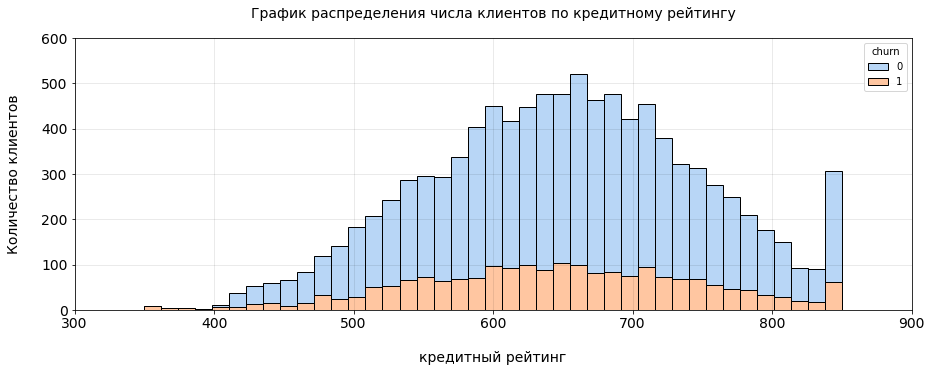

In [13]:
# Plot for score
binary_plot(df_bank, 'score', 'churn',
            'График распределения числа клиентов по кредитному рейтингу' ,
            'кредитный рейтинг', 'Количество клиентов'                  , 
            ymin = 0.0, ymax = 601, step = 100.0                         )

*Вывод:* В случае кредитного рейтинга все выглядит более менее равномерно, следовательно наши текущие программы работают корректно и нацелены на клиентов с различным уровнем кредитного доверия.

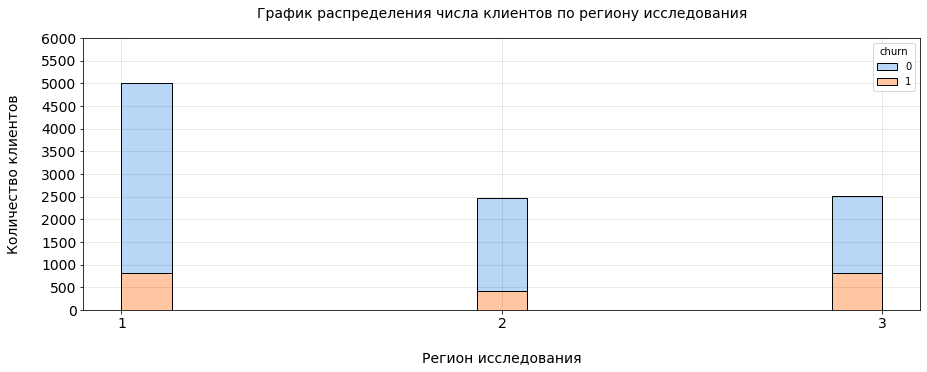

In [14]:
# Plot for city
binary_plot(df_bank, 'city', 'churn',
            'График распределения числа клиентов по региону исследования' ,
            'Регион исследования', 'Количество клиентов'                  , 
            ymin = 0.0, ymax = 6001, step = 500.0                         )

In [15]:
report = df_bank.groupby(['city', 'churn']).agg({'score':['count']}).reset_index()

# Rename columns
report.columns = ['city'       , 
                  'client_status',
                  'clients_numb, %']

report['clients_numb, %'] = (report['clients_numb, %'] / np.sum(report['clients_numb, %'])) * 100
# Change city name for report
report['city']     = report['city'].replace(1,'ярославль'     )
report['city']     = report['city'].replace(2,'рыбинск'       )
report['city']     = report['city'].replace(3,'ростов великий')
report

,city,client_status,"clients_numb, %"
0,ярославль,0,42.04%
1,ярославль,1,8.10%
2,рыбинск,0,20.64%
3,рыбинск,1,4.13%
4,ростов великий,0,16.95%
5,ростов великий,1,8.14%


*Вывод:* Больше всего клиентов в Ярославле, что не удивительно, поскольку это самый крупный из представленных городов. При этом стоит отметить, что количество клиентов, ушедших из банка в Ростове Великом, примерно такое же, как и в Ярославле, при том что население города меньше. Возможно нужно будет обратить на это дополнительное внимание.

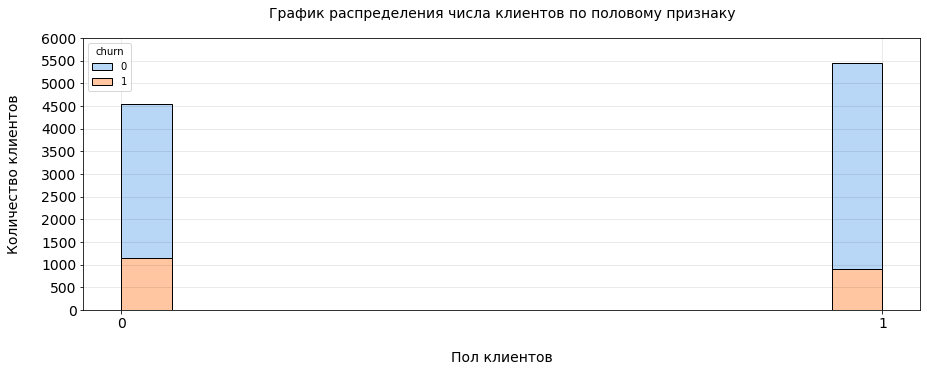

In [16]:
# Plot for gender
binary_plot(df_bank, 'gender', 'churn', 
            'График распределения числа клиентов по половому признаку' ,
            'Пол клиентов', 'Количество клиентов'                      , 
            ymin = 0.0, ymax = 6001, step = 500.0                      )

*Вывод:*  В исследуемой выборе количество мужчин (1) и женщин (0) примерно одинаковое, при этом женщины чаще покидают наш банк, возможно стоит подумать о специальной клиентской программе.

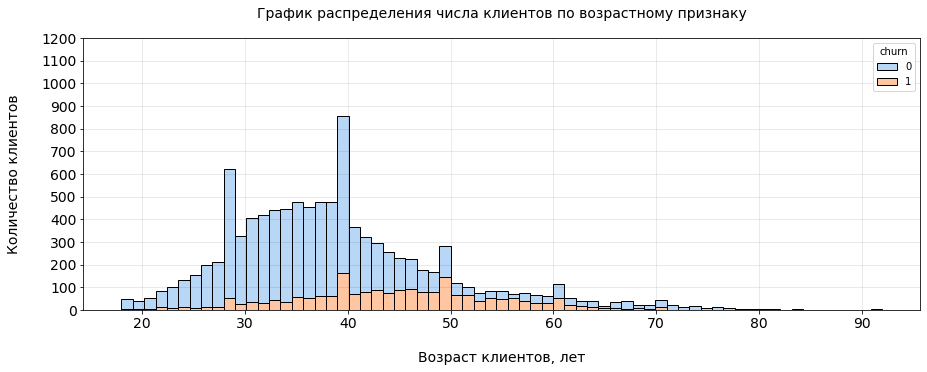

In [17]:
# Plot for age
binary_plot(df_bank, 'age', 'churn', 
            'График распределения числа клиентов по возрастному признаку' ,
            'Возраст клиентов, лет', 'Количество клиентов'            , 
            ymin = 0.0, ymax = 1201, step = 100.0                      )

*Вывод*: Количество молодых клиентов банка явно превалирует над количеством более возрастных клиентов. Также можно заметить, что, начиная с 49-50 лет отток клиентов превалирует над числом оставшихся клиентов. Такая тенденция сохраняется вплоть до 63 лет. Следовательно можно подумать над усовершенствованием программ для пенсионеров и людей предпенсионного возраста.  

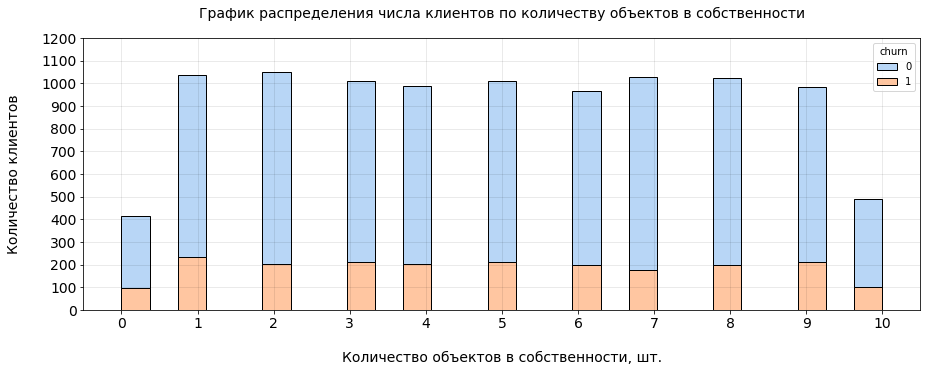

In [18]:
# Plot for objects
binary_plot(df_bank, 'objects', 'churn', 
            'График распределения числа клиентов по количеству объектов в собственности' ,
            'Количество объектов в собственности, шт.', 'Количество клиентов'            , 
            ymin = 0.0, ymax = 1201, step = 100.0                      )

*Вывод:* Здесь все выглядит примерно одинаково, следовательно у нашего банка существует программа, при которой клиенты с одним объектом недвижимости находятся примерно в равных условиях по отношению к более обеспеченными клиентам.

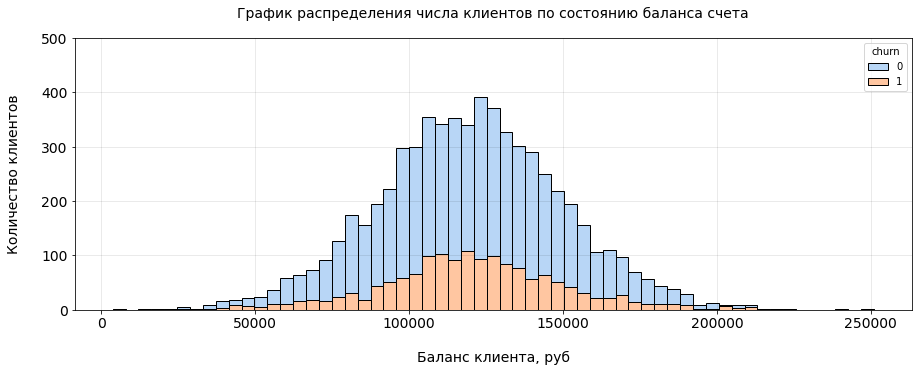

In [19]:
# Plot for balance
binary_plot(df_bank, 'balance', 'churn', 
            'График распределения числа клиентов по состоянию баланса счета' ,
            'Баланс клиента, руб', 'Количество клиентов'                     , 
            ymin = 0.0, ymax = 501, step = 100.0                             )

*Вывод:* Сложно сделать какой-либо вывод о работе наших программ на основе только текущего баланса счета, однако отмечу, что они распределены нормально.  

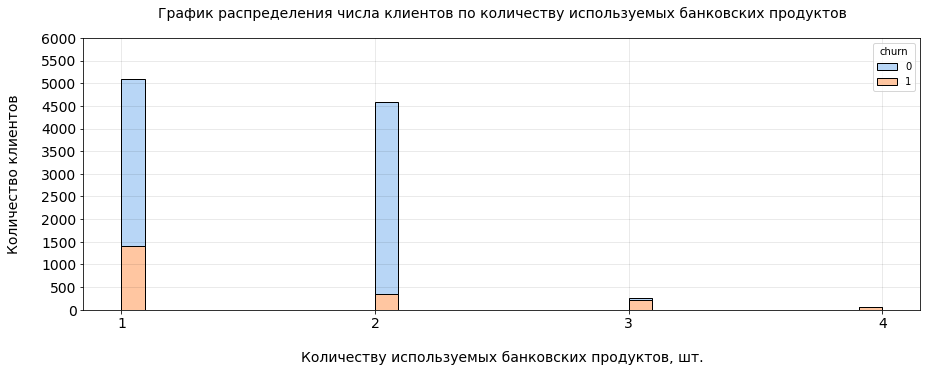

In [20]:
# Plot for products
binary_plot(df_bank, 'products', 'churn', 
            'График распределения числа клиентов по количеству используемых банковских продуктов' ,
            'Количеству используемых банковских продуктов, шт.', 'Количество клиентов'            , 
            ymin = 0.0, ymax = 6001, step = 500.0                                                 )

In [21]:
report = df_bank.groupby('products').agg({'churn':['count']}).reset_index()

# Rename columns
report.columns = ['products'    , 
                  'clients_numb']

report['clients_numb'] = (report['clients_numb'] / np.sum(report['clients_numb'])) * 100
report

,products,clients_numb
0,1,50.84%
1,2,45.90%
2,3,2.66%
3,4,0.60%


*Вывод:* Клиенты, использующие 3 и 4 продукта, следует объединить в одну группу, которая вместе составит чуть более 3% от общего числа случаев. Кроме того, отмечу, что большинство таких клиентов уходят от нас гораздо чаще других клиентов. 

In [22]:
df_bank['products'] = df_bank['products'].replace(4, 3)

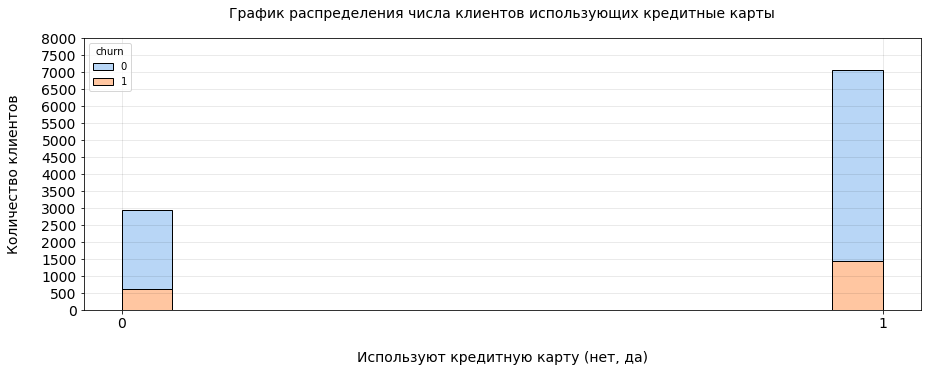

In [23]:
# Plot for creditcard
binary_plot(df_bank, 'creditcard', 'churn', 
            'График распределения числа клиентов использующих кредитные карты' ,
            'Используют кредитную карту (нет, да)', 'Количество клиентов'      , 
            ymin = 0.0, ymax = 8001, step = 500.0                              )

*Вывод:* Большинство клиентов используют кредитные карты.

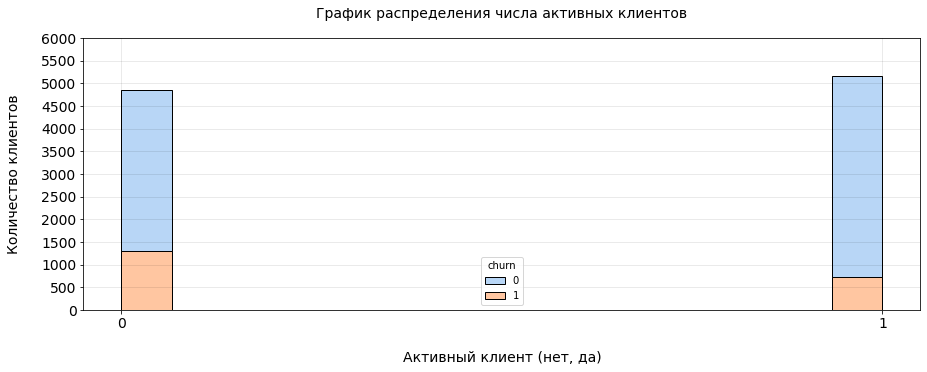

In [24]:
# Plot for loyalty
binary_plot(df_bank, 'loyalty', 'churn', 
            'График распределения числа активных клиентов'    ,
            'Активный клиент (нет, да)', 'Количество клиентов', 
            ymin = 0.0, ymax = 6001, step = 500.0             )

*Вывод:* Количество активных и неактивных клиентов примерно одинаковое. При этом неактивные клиенты чаще покидают наш банк.

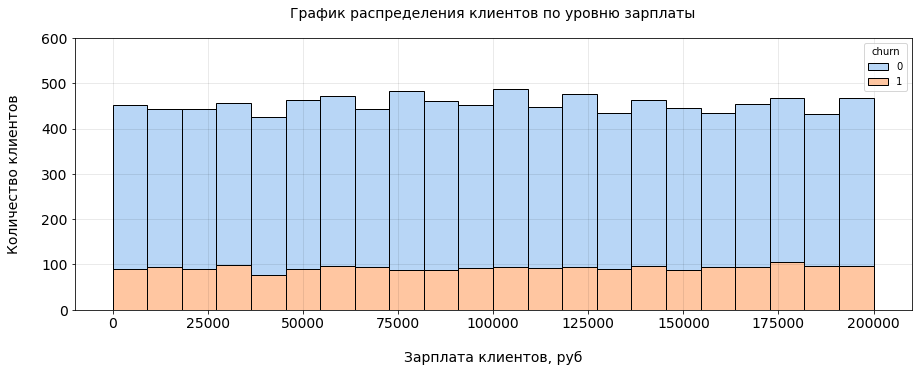

In [25]:
# Plot for estimated_salary
binary_plot(df_bank, 'estimated_salary', 'churn', 
            'График распределения клиентов по уровню зарплаты' ,
            'Зарплата клиентов, руб', 'Количество клиентов', 
            ymin = 0.0, ymax = 601, step = 100.0             )

*Вывод:* Клиенты с разными уровнями зарплаты ведут себя примерно одинакаво, следовательно у нас все хорошо с такими программами. 

**Вывод по подразделу:** Построенные гистограммы распределения числа клиентов в зависимости от различных признаков показывают наиболее проблематичные признаки и те признаки, для которых наши программы работают корректно.

Для дальнейшего более подробного анализа я бы выделил следующие признаки: 
1. **city** или регион исследования;
2. **gender** или пол клиентов;
3. **products** или количество используемых продуктов;
4. **age** или возраст клиентов.

По остальным признакам количество оставшихся и ушедших клиентов примерно одинаковое и для выполнения сегментации клиентов не будет играть столь существенной роли.


Отдельно отмечу, что только построив гистограммы распределения клиентов по признакам, можно наметить первые потенциально возможные меры для уменьшения оттока клиентов:
1. Обратить внимание на существующие программы банка в регионе Ростов Великий, возможно они некорректны или не подходят для данного региона. Кроме того, возможно, что нам необходимо организовать дополнительные семинары для наших сотрудников из этого филиала по улучшению качества работы с клиентами.

2. Подумать над созданием специальных условий для женщин, которые заинтересованы в услугах нашего банка; например, создать специальный вклад с привлекательными процентными ставками, доступный в период с 5 по 10 марта. 

3. Подумать над усовершенствованием программ для пенсионеров и людей предпенсионного возраста, для которых наблюдается превалирующий отток.

4. Больше предлагаемых продуктов - не значит лучше. Исходя из анализа данных отмечу, что наши клиенты, использующие 3 и более продуктов банка, почти в 100% случаев уходят от нас. Следовательно, нам надо подумать над качеством наших дополнительных программ и, возможно, уменьшить долю рекламы банка для таких клиентов.  

####  Сегментация пользователей по потреблению банковских продуктов

In [26]:
def segment_vis(df, x_data, y_data, hue_data,  # data for analysis
                title, xlabel, ylabel       ,  # titles
                ymin , ymax  , step         ): # limits for axis
    '''
    Эта функция содержит набор команд для визуализации сегментов.
    df       : DataFrame 
        Dataframe with data
    x_data   : Objects
        Name of column for analysis
    y_data   : Objects
        Name of column for analysis        
    hue_data : Objects 
        Name of column for dividing x_data
    title    : Objects
        Name of plot (plot title)
    xlabel   : Objects 
        Name of x axis (label)         
    ylabel   : Objects 
        Name of y axis (label) 
    ymin      : Float 
    ymax      : Float
    step      : Float
        Limits for y axis
    '''
    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize = (15, 5))
    ax  = fig.add_subplot(111) 

    # Plot labels
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)
    
    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(data  = df  , x = x_data, y = y_data, hue  = hue_data, 
                   split = True, inner = "quart", linewidth = 1, ax = ax)

    sns.despine(left = True)
    
    ax.grid(True , which     = 'major', 
                   color     = 'k'    ,
                   linestyle = 'solid',
                   alpha     = 0.1    )
    
    ax.set_yticks(np.arange(ymin, ymax, step))
    
    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)  
           
    plt.show()

In [27]:
report = (df_bank
            .groupby(['products','churn'])
            .agg({'age':['mean', 'count']})
            .reset_index()
         )

# Rename columns
report.columns = ['products_grout' , 
                  'client_status'  , 
                  'mean_age_client',
                  'client_numbers, %' ]

report['client_numbers, %'] = (report['client_numbers, %'] / np.sum(report['client_numbers, %'])) * 100
print('Доля оттока в трех продуктовых группах')
pd.set_option('display.float_format', '{:.2f}'.format)
report

Доля оттока в трех продуктовых группах


,products_grout,client_status,mean_age_client,"client_numbers, %"
0,1,0,37.67,36.75
1,1,1,44.91,14.09
2,2,0,37.19,42.42
3,2,1,44.66,3.48
4,3,0,37.30,0.46
5,3,1,44.70,2.80


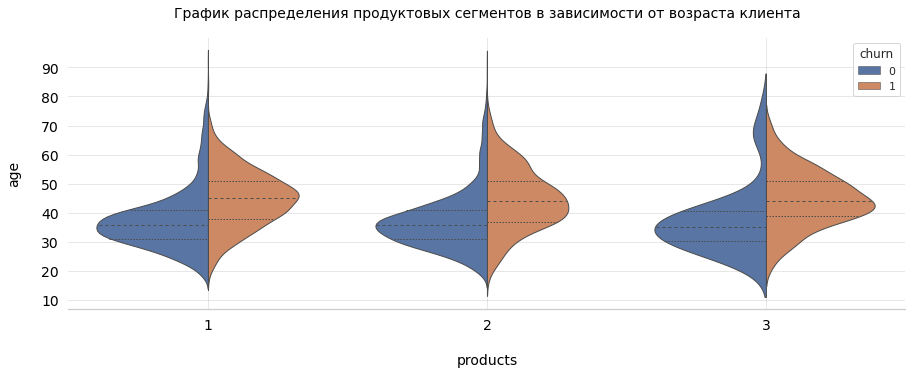

In [28]:
# Plot for age product segments
segment_vis(df_bank, 'products', 'age', 'churn', 
            'График распределения продуктовых сегментов в зависимости от возраста клиента',
            'age', 'products', ymin = 10.0, ymax = 91, step = 10.0)

*Вывод:* Во всех трех группах наибольшее число ушедших клиентов имеют возраст от 39 до 52 лет. Скорее всего таких людей не устраивают банковские программы, направленные на формирование будущей пенсии или иных накопительных программ. 

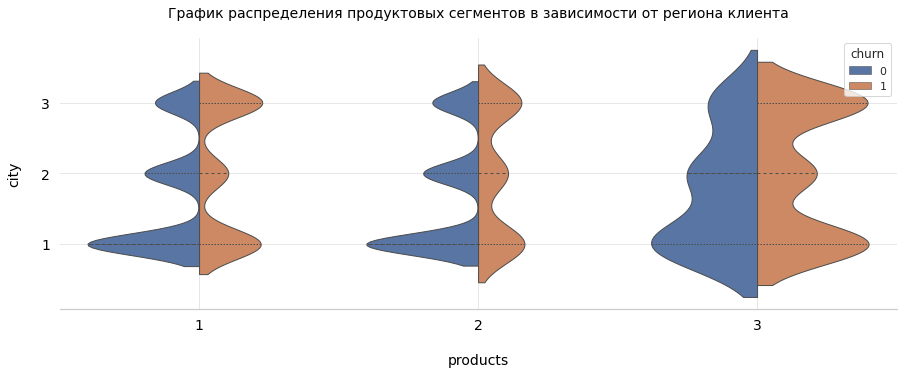

In [29]:
# Plot for age product segments
segment_vis(df_bank, 'products', 'city', 'churn', 
            'График распределения продуктовых сегментов в зависимости от региона клиента',
            'Возраст клиента', 'Количество клиентов', 
            ymin = 1.0, ymax = 3.1, step = 1.0             )

*Вывод:* Клиенты из Ростова Великий наиболее склонны к оттоку по сравнению с другими городами

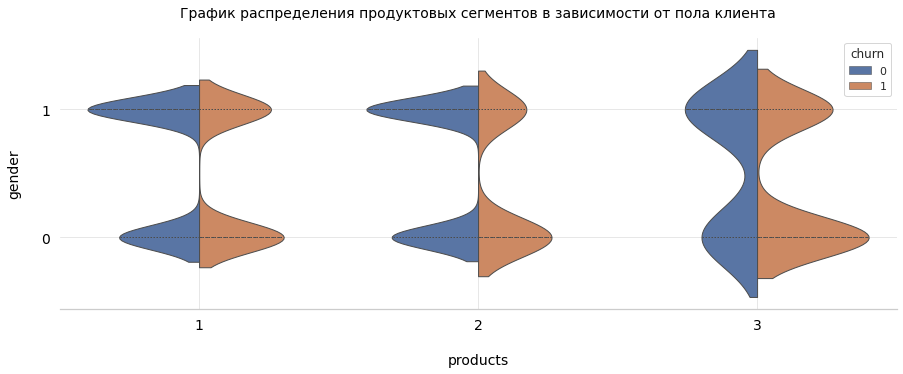

In [30]:
# Plot for age product segments
segment_vis(df_bank, 'products', 'gender', 'churn', 
            'График распределения продуктовых сегментов в зависимости от пола клиента',
            'gender', 'products', ymin = 0.0, ymax = 1.1, step = 1.0                  )

*Вывод:* Женщины чуть более склоны к оттоку

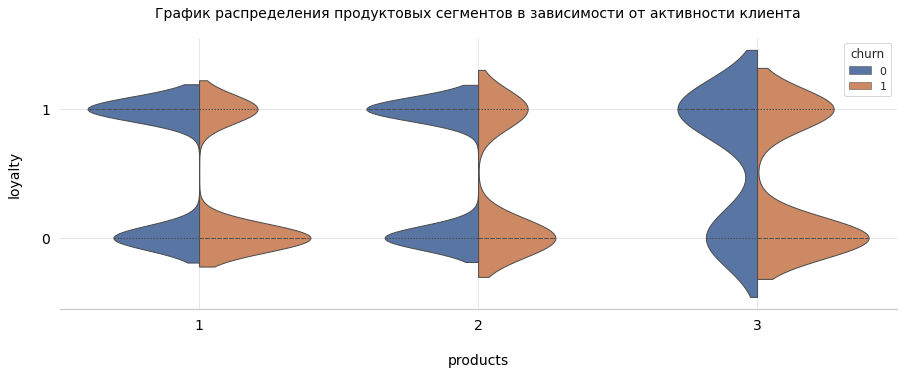

In [31]:
segment_vis(df_bank, 'products', 'loyalty', 'churn', 
            'График распределения продуктовых сегментов в зависимости от активности клиента',
            'loyalty', 'products', ymin = 0.0, ymax = 1.1, step = 1.0)

*Вывод:* Лояльные (активные) пользователи чаще остаются с банком, чем нелояльные. Скорее всего такие пользователи стали участниками наших программ в результате каких-нибудь рекламных компаний или специальных акций, по окочанию которых клиенты перестали пользоваться нашими услугами.

**Вывод по разделу:** Выполненная сегментация по количеству используемых продуктов с применением дополнительных критериев потвердила ранее озвученные предположения.

#### Проверка гипотез

1. Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


Прежде, чем приступить к проверке гипотез нужно подготовить данные для анализа:

1. Извлечь из общего клиентов, только тех кто пользуется одним или двумя продуктами банка;
2. Поскольку за доход отвечает столбец **estimated_salary**, а в нем нет пропусков, то удалять пропущенные значения из столбца **balance** нет необходимости.
3. Рассчитать значение математического ожидания для того чтобы сформулировать гипотезы.

In [32]:
# Group01 use 1 bank product
df_group_01 = df_bank.query('products == 1')
gr01_salary = df_group_01['estimated_salary'].values

# Group02 use 2 bank products
df_group_02 = df_bank.query('products == 2')
gr02_salary = df_group_02['estimated_salary'].values

print(  'Group01 mean salary:', np.mean(gr01_salary), 
      '\nGroup02 mean salary:', np.mean(gr02_salary))

Group01 mean salary: 99486.76101494886 
Group02 mean salary: 100451.52418300654


Сформулируем статистическую гипотезу.

**Нулевая гипотеза:** средний уровень дохода клиентов использующих два продукта банка, равен среднему уровню дохода клиентов использующих только один продукт ($H_{0}: m_{z_{group02}} = m_{z_{group01}}$) . 

**Альтернативная гипотеза:** средний уровень дохода клиентов использующих два продукта банка, отличается от среднего уровня доходов клиентов использующих только один продукт ($H_{0} \neq m_{z_{group02}} \neq m_{z_{group01}}$)


Для проверки гипотезы использую использую специальный тест - критерий Стьюдента (t-критерий), который базируется на использовании статистики Стьюдента. В частности нам нужно проверить гипотезу о равенстве средних двух выборок.

In [33]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(gr01_salary, gr02_salary)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.41046832068869554
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% не опровергается и следовательно, предположение о том, что средний уровень дохода клиентов использующих один или два банковских продукта является одинаковым - верно.

2. Проверьте гипотезу различия среднего уровня заработной платы клиентов, мужского и женского пола, которые пользуются одним продуктом банка.

In [34]:
# Group01 use 1 bank product
df_man = df_bank.query('(gender == 1) & (products == 1)')
df_man_salary = df_man['estimated_salary'].values

# Group02 use 2 bank products
df_women = df_bank.query('gender == 0 & (products == 1)')
df_women_salary = df_women['estimated_salary'].values

print(  'Man mean salary:'  , np.mean(df_man_salary), 
      '\nWomen mean salary:', np.mean(df_women_salary))

Man mean salary: 98674.51255380201 
Women mean salary: 100473.06271777004


Сформулируем статистическую гипотезу.

**Нулевая гипотеза:** средний уровень дохода клиентов мужского пола, равен среднему уровню дохода клиентов женского пола ($H_{0}: m_{z_{group02}} = m_{z_{group01}}$) . 

**Альтернативная гипотеза:** средний уровень дохода клиентов мужского пола, отличается от среднего уровня доходов клиентов женского пола ($H_{0}: m_{z_{group02}} \neq m_{z_{group01}}$)

In [35]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_man_salary, df_women_salary)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.26594762299023605
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% не опровергается и следовательно, предположение о том, что средний уровень дохода клиентов мужского и женского пола является одинаковым - верно.

#### Проверка значимости признаков 

***Модель прогнозирования оттока клиентов***

При использовании машинного обучения в данных не должно быть пропусков. Поэтому, чтобы не удалять 3600 значений из столбца **balance**, я заполню их на основе медианных значений по колонке **region**. 

In [36]:
# Create spesial dataframe for machine learning
df_bank_ml = df_bank

# Check nan values
print('Numbers of NaN values in the dataset - df_bank_ml')
print(df_bank_ml.isnull().sum())
    
df_bank_ml['balance'] = df_bank_ml.groupby(['city'])['balance'].apply(lambda x: x.fillna(x.median()))

# Check nan values - again
print('')
print('Numbers of NaN values in the dataset - df_bank_ml')
print(df_bank_ml.isnull().sum())

Numbers of NaN values in the dataset - df_bank_ml
userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Numbers of NaN values in the dataset - df_bank_ml
userid              0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64


Пропусков больше нет, но заполнены они грубым способом

Далее я буду использовать бинарную классификация, поскольку у меня есть только два события: 0 - клиент остался, 1 - клиент ушел. Кроме того, из исходного набора данных я удалю следующие колонки **userid** и **creditcard**, поскольку они практически не имеют никакой связи с исследуемой переменной (см. матрицу корреляций). 

In [37]:
# Разделяю данные на признаки (матрица X) и целевую переменную (y)

X = df_bank.drop(['churn', 'userid', 'creditcard'], axis = 1)
y = df_bank['churn']

# Разделяю модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создаю объект класса StandardScaler и применяю его к обучающей выборке
scaler = StandardScaler()

# Обучаю scaler и одновременно трансформирую матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)  

# Применяю стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# Задаю список моделей для определения наилучшей
models = [LogisticRegression(random_state = 0)        ,
          RandomForestClassifier(random_state = 0)    ,
          GradientBoostingClassifier(random_state = 0)]   
    
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(mod, X_train, y_train, X_test, y_test):
    # алгоритм для модели
    model = mod
    # обучаю модель
    model.fit(X_train, y_train)   
    # делаю прогноз с использованием обученной модели
    y_pred = model.predict(X_test)
    # Считаю метрики для моделей
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(accuracy_score (y_test, y_pred),
                                                                   precision_score(y_test, y_pred),
                                                                   recall_score   (y_test, y_pred))
         )
    
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print('')

LogisticRegression(random_state=0)
Accuracy:0.81 Precision:0.62 Recall:0.22 

RandomForestClassifier(random_state=0)
Accuracy:0.87 Precision:0.76 Recall:0.52 

GradientBoostingClassifier(random_state=0)
Accuracy:0.87 Precision:0.74 Recall:0.52 



**Вывод по разделу:** В ходе выполения данной задачи я обучил и использовал три модели (**LogisticRegression**, **RandomForestClassifier**, **GradientBoostingClassifier**), которые позволяют выполнить бинарную классификацию с учителем. Выполнив предварительную стандартизацию и разбивку выборки в соотношении 80 на 20, я рассчитал метрики для оценки эффективности обученных моделей. 

Для оценки я использовал такие показатели как: **accuracy**, **precision** и **recall**, которые отображают общие представления о качестве работы моделей.

На основании этих показателей мне удалось определить, что модель **GradientBoostingClassifier** имеет наилучший результат. 

Дополнительно выполню повторное обучение лучшей модели для определения наиболее важных признаков, которые влияют на отток клиентов.

In [38]:
# Обучаю  финальную модель
final_model = GradientBoostingClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

importances = final_model.feature_importances_

priznak = []
for i in X_test.columns:
    priznak.append(i)

data_init = {'Priznak': priznak, 'Importance': importances}
df = pd.DataFrame(data = data_init)
print(df.sort_values(by = 'Importance', ascending = False)) 

            Priznak  Importance
3               age        0.40
6          products        0.30
7           loyalty        0.11
5           balance        0.08
1              city        0.06
0             score        0.02
2            gender        0.02
8  estimated_salary        0.01
4           objects        0.00


**Вывод по разделу:** Наиболее важными признаками, на которые стоит обращать внимания являются:
* `age ` — возраст клиента;
* `products` — количество продуктов, которыми пользуется клиент, 
* `loyalty` — статус активного клиента.

Следовательно, можно предположить, что основная задача, для того, чтобы уменьшить отток клиентов, заключается в создании таких программ, которые были бы одинаково привлекательными различным возрастным группам клиентов. Кроме того, для каждого клиента совсем не объязательно предоставлять как можно больше банковских продуктов, а требуется сосредоточить наше внимание на 1, максимум 2 продуктах, но сделать их максимально клиентоориентированными. Дополнительно, для нас является важным постоянная качественная поддержка активных клиентов, например, за счет создания специальных условий кэшбэка. 

P.S.: Результаты машинного обучения с целью нахождения наиболее актуальных признаков полностью совпали с ранее упомянутыми признаками на основе корреляционной матрицы.

## Вывод по проекту

В ходе выполнения работы был проведен анализ данных, на основе которого выполнено сегментирования клиентов банка по потреблению количества банковских продуктов с учетом доли оттока клиентов и различных признаков, которые могут влиять на поведенческие алгоритмы клиентов:
1. Возраста клиентов;
2. Региона проживания клиента;
3. Пола;
4. Степени активности клиента.

**Сегментирование с учетом возраста:**

Данный анализ показал, что в нашем банке количество молодых клиентов банка явно превалирует над количеством более возрастных клиентов. Такие клиенты остаются с нашим банком и пользуются его услугами. Анализ данных показал, что начиная с 49 - 50 лет отток клиентов превалирует над числом оставшихся клиентов. Такая тенденция сохраняется вплоть до 63 лет. 

Следовательно, нам нужно подумать над усовершенствование программ для пенсионеров или людей предпенсионного возраста. В качестве подобных программ можно предложить выпуск специальных банковских карт для перевода пенсий и специальную программу поддержки клиентов, у которых могут возникать сложности с оплатой услуг в интернете, что особенно актуально для пенсионеров. 

**Сегментирование с учетом региона проживания клиента:**

Данный анализ показал, что наибольший отток клиентов зафиксирован в Ростове Великом (8.5%). Следовательно, необходимо обратить внимание на существующие программы банка в регионе Ростов Великий, возможно, они некорректно работают или не подходят для данного региона. Кроме того, возможно, необходимо организовать дополнительные семинары для наших сотрудников из этого филиала по улучшению качества работы с клиентами.

**Сегментирование с учетом пола клиентов:** 

Данный анализ показал, что женщины наиболее склонны к оттоку, чем мужчины. Поэтому необходимо подумать над созданием специальных условий (акций) для женщин, которые заинтересованы в услугах нашего банка, например, создать специальный вклад с привлекательными процентными ставками, доступный в период с 5 по 10 марта.

**Сегментирование с учетом лояльности клиентов:**

Для большинства наших лояльных клиентов оказывается важным использовать от 1 до 2 банковских продуктов. Следовательно, больше предлагаемых продуктов - не значит лучше. Исходя из анализа данных, отмечу, что наши клиенты, использующие 3 и более продуктов банка, почти в 100% случаев уходят от нас. Следовательно требуется сфокусировать большее внимание на 1 - 2 качественных продуктах учитывающих особенности региона, возраста и пола, что в конечном итоге позволит сделать банк более клиентоориентированным. Возможно, для наших активных клиентов, следует уменьшить количество рекламных предложений, посколько они вкурсе актуальных программ, что позволит нам не раздражать клиентов излишней навязчивостью. 

Также в ходе работы были проверены две гипотезы:
1. Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
2. Проверьте гипотезу различия среднего уровня заработной платы клиентов, мужского и женского пола, которые пользуются одним продуктом банка.

Показавшие, что:
1. в исследуемой выборке, нет существенной разницы между средним уровенем дохода клиентов использующих один или несколько банковских продуктов;
2. в исследуемой выборке, нет существенной разницы между средним уровенем дохода мужчин и женщин.

## Дополнительные материалы

1. [Презентация в формате pdf][1]
2. [Дашборд][2]

[1]: https://docs.google.com/presentation/d/1GKQ_Jg4wzSAPsLpUyq-DvHMVNON3pDfU/edit?usp=sharing&ouid=115370727695513060066&rtpof=true&sd=true
[2]: https://public.tableau.com/views/Finalproject_16509803045450/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link